## Dealing with images

We'll take a look at the Python Imaging Library. The main points about this library:

- Reads and writes essentially any image format.
- Can do all sorts of manipulation (resizing, cropping, enhancing, drawing, compositing).
- Can convert to and from NumPy arrays.

We'll also briefly look at reading and writing images with `matplotlib` and `scikit-image`. Main features of `matplotlib`:

- Only reads PNG format.
- Doesn't do any manipulation, although you can resize an image in `scipy`.
- Writes most common formats (PNG, JPG, GIF, plus PDF and SVG for vectors).
- Uses NumPy arrays implicitly.

To install it, do:

    conda install pillow

Start with the usual:

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## A quick look at `matplotlib`

[Here are the docs.](https://matplotlib.org/users/image_tutorial.html)

Matplotlib can only load PNGs natively. You can load a JPEG, but mpl will use PIL behind the scenes.

Unlike PIL, mpl loads images as 4-byte floats in [0, 1]. 

In [2]:
import matplotlib.image as mpimage

img = mpimage.imread("../data/quartz-arenite_Michael-C-Rygel_CC-BY-SA.png")

In [3]:
img

array([[[ 0.21568628,  0.20784314,  0.21960784],
        [ 0.20392157,  0.19607843,  0.21568628],
        [ 0.1882353 ,  0.19215687,  0.20784314],
        ..., 
        [ 0.2       ,  0.19607843,  0.21568628],
        [ 0.20392157,  0.20392157,  0.21176471],
        [ 0.20784314,  0.20784314,  0.21568628]],

       [[ 0.20392157,  0.2       ,  0.21960784],
        [ 0.42352942,  0.41960785,  0.43921569],
        [ 0.50588238,  0.50980395,  0.52941179],
        ..., 
        [ 0.50980395,  0.51372552,  0.52941179],
        [ 0.42745098,  0.42352942,  0.44313726],
        [ 0.19607843,  0.19607843,  0.20392157]],

       [[ 0.19607843,  0.2       ,  0.21960784],
        [ 0.50980395,  0.50980395,  0.5411765 ],
        [ 0.60392159,  0.61960787,  0.65490198],
        ..., 
        [ 0.59607846,  0.60784316,  0.627451  ],
        [ 0.50196081,  0.50588238,  0.52156866],
        [ 0.19215687,  0.1882353 ,  0.20784314]],

       ..., 
       [[ 0.20784314,  0.2       ,  0.20392157],
        

Notice we have an h &times; w &times; 3 array — this is an RGB image. PNGs often have a 4th channel, alpha or A, which holds opacity.

`plt.imshow()` plots 3-channel arrays like this in colour:

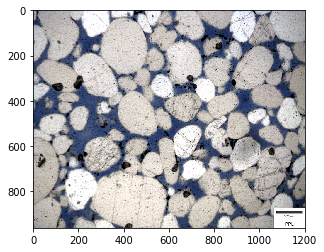

In [4]:
plt.imshow(img)

We can plot only the red channel (say), and apply false colour via a lookup table:

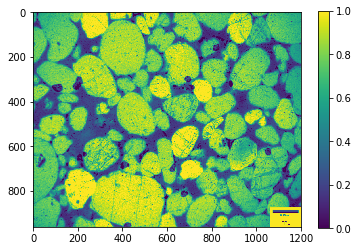

In [5]:
plt.imshow(img[..., 0])
plt.colorbar()

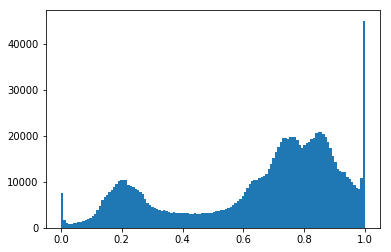

In [6]:
_ = plt.hist(img[..., 0].ravel(), bins=128)

## PIL's `Image` object

[Here are the docs!](http://effbot.org/imagingbook/image.htm)

In [7]:
from PIL import Image
im = Image.open('../data/quartz-arenite_Michael-C-Rygel_CC-BY-SA.jpg')

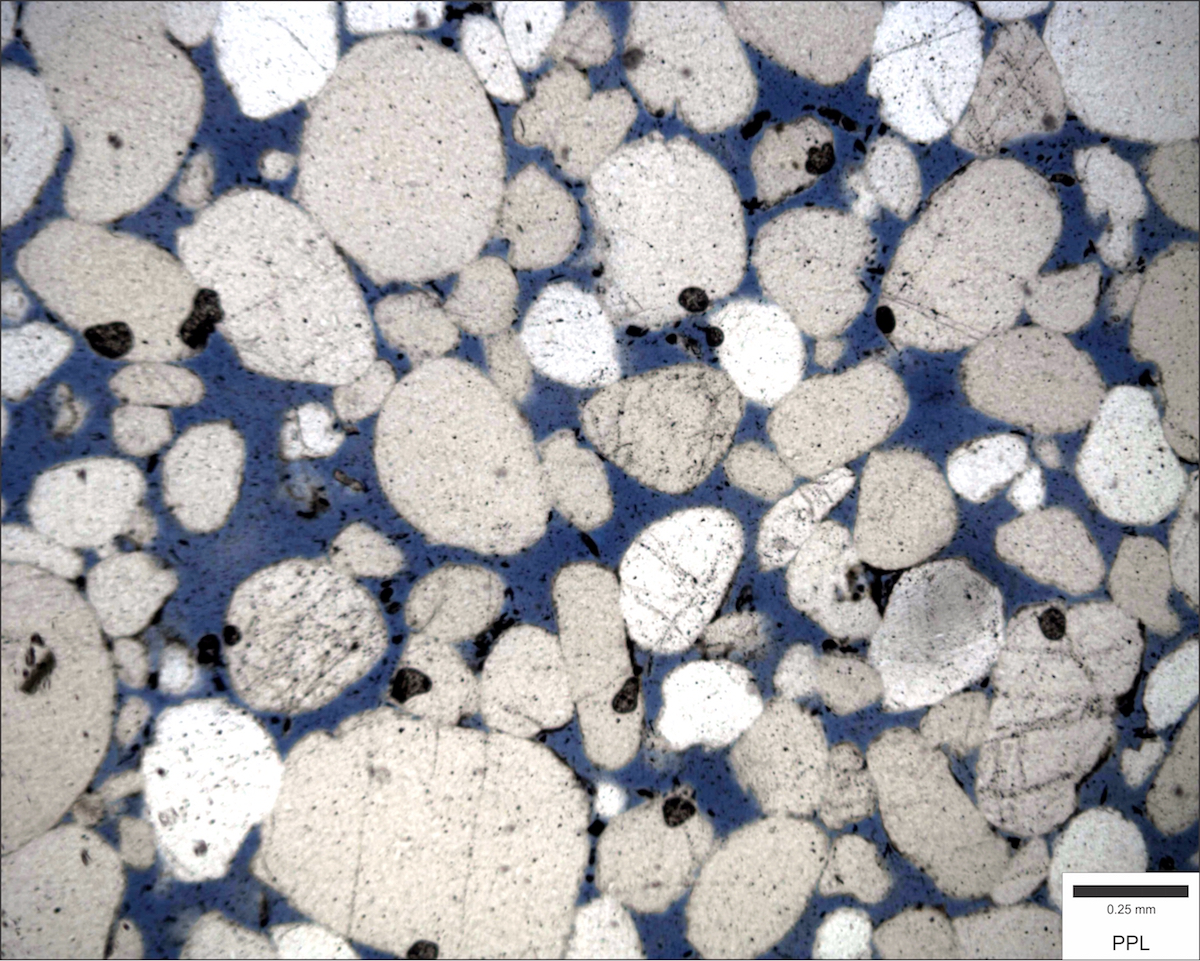

In [8]:
im

Notice that the size (not `shape`!) is reported as columns &times; rows, so it's different from a NumPy array.

In [9]:
im.size

(1200, 961)

In [10]:
np.array(im).shape

(961, 1200, 3)

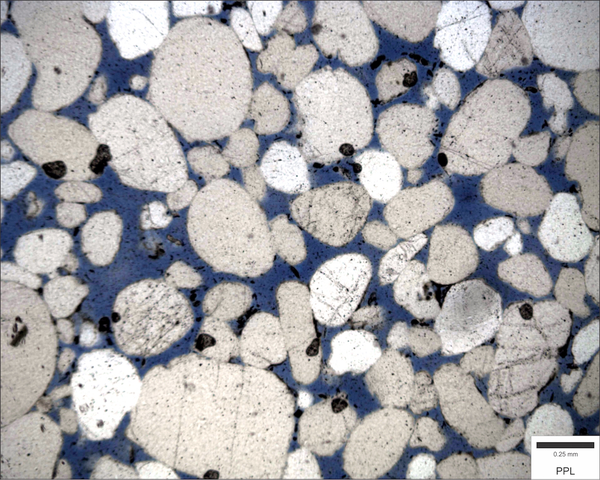

In [11]:
aspect = 1200/961
w = 600
h = int(w / aspect)   # Has to be an int.

im = im.resize((w, h), Image.ANTIALIAS)
im

You can save having to compute the new image size with the `thumbnail` method but be careful — it resizes the image in place:

In [12]:
temp = im.copy()
temp.thumbnail((64, 64), Image.ANTIALIAS)

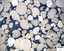

In [13]:
temp

We can plot this little image and see that it's now pixellated at any reasonable size:

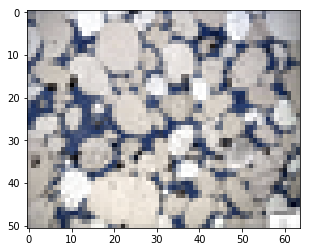

In [14]:
plt.imshow(temp, interpolation='none')

We can ask `imshow` for some more sensible interpolation:

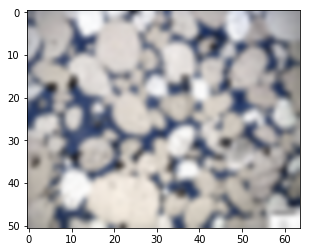

In [15]:
plt.imshow(temp, interpolation='bicubic')

## Handling images as arrays

As you see in the last example, we can treat PIL `Image` as an array sometimes, eg passing it to `imshow`. But sometimes it's convenient to treat images entirely as NumPy arrays. It's easy to convert between the two:

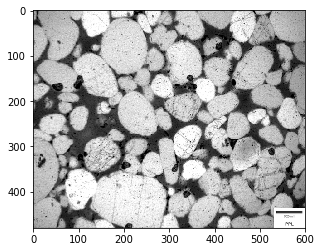

In [16]:
rgb = np.array(im)

red_channel = rgb[:, :, 0]
plt.imshow(red_channel, cmap='gray')

Note that NumPy doesn't implicitly care about the values:

In [17]:
np.max(red_channel)

255

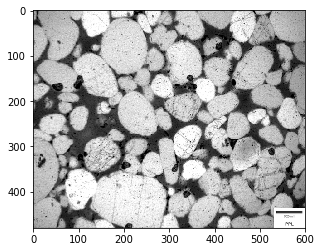

In [18]:
red_max1 = red_channel / 255
plt.imshow(red_max1, cmap='gray')

But if you convert back to a PIL `Image`, it cares. In fact, it won't even accept our decimal numbers in the 0–1 range:

In [19]:
im_red =  Image.fromarray(red_max1)
im_red

OSError: cannot write mode F as PNG

<PIL.Image.Image image mode=F size=600x480 at 0x10F562550>

We have to cast them to unsigned 8-bit integers (i.e. integers in the range 0 to 255). But that's still not enough:

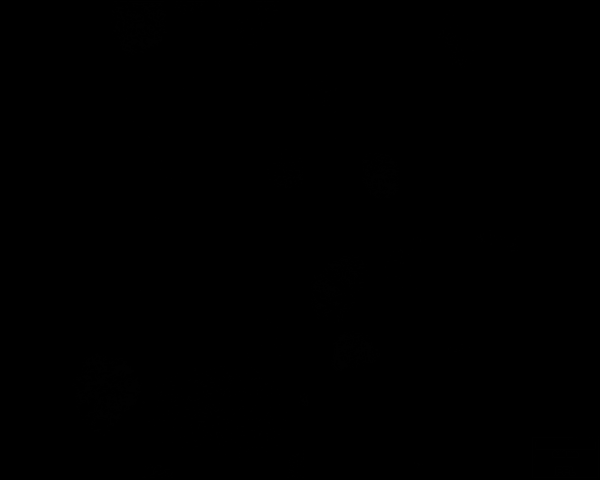

In [20]:
im_red = Image.fromarray(np.uint8(red_max1))
im_red

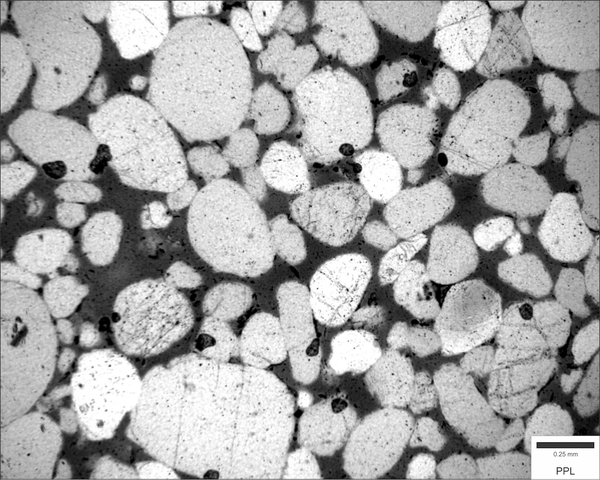

In [21]:
im_red = Image.fromarray(np.uint8(red_max1 * 255))
im_red

### Exercise

- Make a histogram of the image using [the `histogram()` method](http://effbot.org/imagingbook/image.htm#tag-Image.Image.histogram) on `Image`.
- Use the `crop()` method on the `Image` to crop the scalebar off the image.
- Crop the scalebar out of the image, and calculate the real-world size of each pixel in the image.
- Compute the luminance of the image $Y = 0.299 R + 0.587 G + 0.114 B$ and plot a transect across the middle of the image.

In [1]:
# Your code here...

### Histogram

In [22]:
im.histogram?

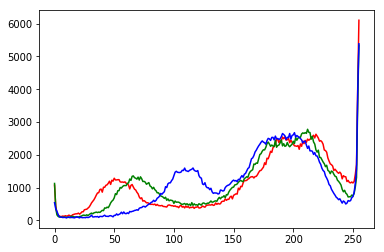

In [23]:
h = np.array(im.histogram())
r, g, b = np.array_split(h, 3)

plt.plot(r, 'r')
plt.plot(g, 'g')
plt.plot(b, 'b')
plt.show()

In [24]:
im.size

(600, 480)

### Cropping

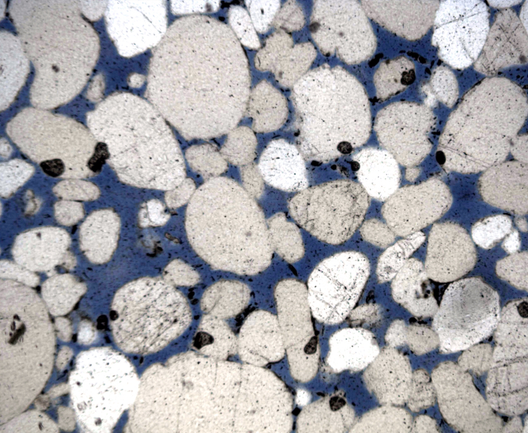

In [25]:
# left, upper, right, lower
main = im.crop((2, 2, 530, 435))
main

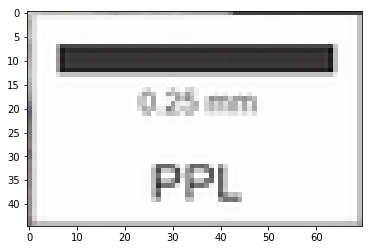

In [26]:
scale = im.crop((530, 435, 600, 480))
scale = np.array(scale)

plt.imshow(scale)

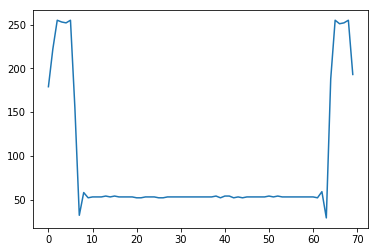

In [27]:
plt.plot(scale[10, :, 0])

In [28]:
bar = scale[10, :, 0] < 100
bar.sum()

57

Therefore we have 57 pixels in the scale bar. We know it's 0.25 mm or 0.25 &times; 10<sup>–3</sup> m long, so each pixel is:

In [29]:
0.25e-3 / 57

4.3859649122807014e-06

... about 4.4 microns wide.

### Luminance

In [30]:
r, g, b = np.array(main).T
y = 0.299*r + 0.587*g + 0.114*b

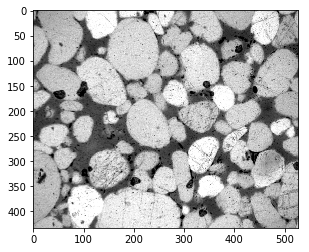

In [31]:
plt.imshow(y.T, cmap='gray')

## Where next?

Next, try the tutorial on [Image segmentation](Image_segmentation.py).